# Analysis of Bayesian Optimisation

Analyse the completed study.

## Setup

In [61]:
STUDY_NAME = "study_preprocessing_final_2" # the name of the study to analyse

In [62]:
import optuna
import pandas as pd
import matplotlib.pyplot as plt

import study_utils

In [63]:
# load the study
study = optuna.load_study(
    study_name=STUDY_NAME, 
    storage=f"sqlite:///data/{STUDY_NAME}/{STUDY_NAME}.db"
)

## Study Results

Best trial: 887
Best trial value: 0.3271770350683088
Best trial hyperparameters: {'pretreatment': 'pretreatment_2', 'savgol_window_size': 13, 'wavelength_range': 'range_402to990', 'conv_1_kernel_size': 1, 'reg_beta': 0.0105, 'lr_init': 0.004741876563091631, 'lr_min_ratio': 0.05, 'batch_size': 320}


C:\Users\12196478\AppData\Local\Temp\ipykernel_10104\721654333.py:5: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

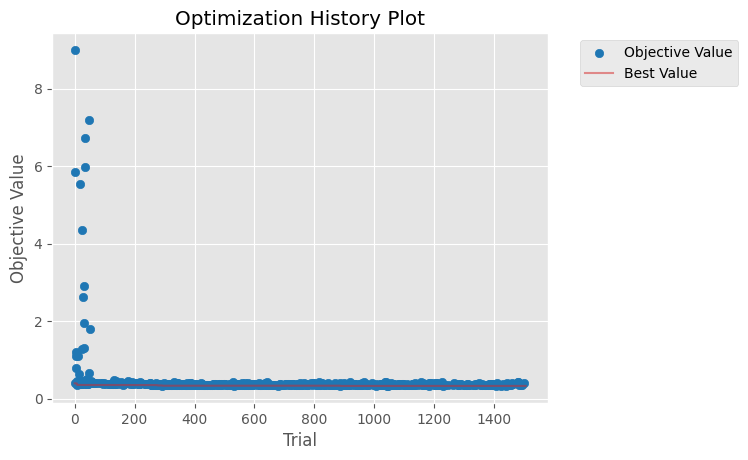

In [64]:
# overview
print("Best trial:", study.best_trial.number)
print("Best trial value:", study.best_trial.value)
print("Best trial hyperparameters:", study.best_trial.params)
optuna.visualization.matplotlib.plot_optimization_history(study)

In [65]:
study_results = study.trials_dataframe().query("number <= 1499")
study_results

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_conv_1_kernel_size,params_lr_init,params_lr_min_ratio,params_pretreatment,params_reg_beta,params_savgol_window_size,params_wavelength_range,user_attrs_metric_calibration_mse,user_attrs_metric_calibration_rmse,user_attrs_metric_tuning_mse,user_attrs_metric_tuning_rmse,user_attrs_trained_epochs,system_attrs_fixed_params,state
0,0,0.394137,2024-03-17 20:11:13.371715,2024-03-17 20:24:11.924506,0 days 00:12:58.552791,128,21,5.000000e-03,0.050,pretreatment_2,0.0055,13.0,range_684to990,0.426193,0.705009,0.504316,0.758394,485.0,"{'pretreatment': 'pretreatment_2', 'savgol_win...",COMPLETE
1,1,5.842570,2024-03-17 20:11:13.383679,2024-03-17 20:17:25.103691,0 days 00:06:11.720012,512,85,3.111065e-07,0.250,pretreatment_1,0.0400,33.0,range_402to990,119.409050,11.173320,118.614960,11.137742,750.0,NaN,COMPLETE
2,2,9.003330,2024-03-17 20:11:13.390955,2024-03-17 20:17:18.263749,0 days 00:06:04.872794,512,93,1.305386e-07,0.150,pretreatment_1,0.0695,37.0,range_720to990,204.547684,14.623785,200.708176,14.491915,750.0,NaN,COMPLETE
3,3,0.781385,2024-03-17 20:17:18.327763,2024-03-17 20:22:25.347610,0 days 00:05:07.019847,512,61,2.642442e-06,0.050,pretreatment_1,0.0665,29.0,range_720to990,2.146610,3.092404,2.219562,3.104179,750.0,NaN,COMPLETE
4,4,1.210557,2024-03-17 20:17:25.377095,2024-03-17 20:22:13.041683,0 days 00:04:47.664588,512,57,6.664291e-06,0.100,pretreatment_0,0.0860,NaN,range_720to990,4.847624,3.183744,4.562513,3.138649,750.0,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,0.797183,2024-03-19 17:33:00.892982,2024-03-19 17:36:02.931934,0 days 00:03:02.038952,448,33,9.005919e-03,0.100,pretreatment_2,0.0335,13.0,range_402to990,NaN,NaN,NaN,NaN,NaN,NaN,PRUNED
1496,1496,0.743641,2024-03-19 17:33:37.969539,2024-03-19 17:35:47.562149,0 days 00:02:09.592610,448,29,2.757795e-03,0.075,pretreatment_3,0.0075,13.0,range_720to990,NaN,NaN,NaN,NaN,NaN,NaN,PRUNED
1497,1497,7.997670,2024-03-19 17:34:45.177388,2024-03-19 17:39:26.031991,0 days 00:04:40.854603,64,97,2.895955e-06,0.150,pretreatment_0,0.0155,NaN,range_720to990,NaN,NaN,NaN,NaN,NaN,NaN,PRUNED
1498,1498,2.591843,2024-03-19 17:35:47.579517,2024-03-19 17:41:43.628711,0 days 00:05:56.049194,64,61,1.223645e-05,0.200,pretreatment_2,0.0520,9.0,range_402to990,NaN,NaN,NaN,NaN,NaN,NaN,PRUNED


In [66]:
study_results.groupby("params_wavelength_range").size()/1500

params_wavelength_range
range_402to990    0.592667
range_600to990    0.135333
range_684to990    0.130000
range_720to990    0.142000
dtype: float64

In [67]:
study_results.query(f"number == {study.best_trial.number}")

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_conv_1_kernel_size,params_lr_init,params_lr_min_ratio,params_pretreatment,params_reg_beta,params_savgol_window_size,params_wavelength_range,user_attrs_metric_calibration_mse,user_attrs_metric_calibration_rmse,user_attrs_metric_tuning_mse,user_attrs_metric_tuning_rmse,user_attrs_trained_epochs,system_attrs_fixed_params,state
887,887,0.327177,2024-03-19 00:46:59.436456,2024-03-19 00:55:12.101710,0 days 00:08:12.665254,320,1,0.004742,0.05,pretreatment_2,0.0105,13.0,range_402to990,0.383417,0.700986,0.402971,0.714797,478.0,NaN,COMPLETE


In [68]:
study_results["new_obj"] = (study_results["user_attrs_metric_calibration_mse"] - study_results["user_attrs_metric_tuning_mse"]).abs() * 0.5 + 0.5 * study_results["user_attrs_metric_tuning_mse"]**(1/2)

In [69]:
study_results["new_rmse"] = study_results["user_attrs_metric_tuning_mse"]**(1/2)

In [70]:
pruned = study_results.query("state == 'PRUNED' and duration <= @pd.Timedelta('3 minute')")

## Evaluate particular model

In [71]:
TRIAL_NUMBER = None

In [72]:
# load trial model and predictions
trial_number = TRIAL_NUMBER if TRIAL_NUMBER else study.best_trial.number
model_name = f"trial_{trial_number}"
# model = tf.keras.models.load_model(
#     filepath=f"data/{STUDY_NAME}/models/eval/{model_name}.model.keras"
# )
predictions = pd.read_pickle(f"data/{STUDY_NAME}/models/eval/predict/{model_name}.pkl")
# predictions = predictions.query("subsequent_flag_1 == 0")

In [73]:
train_instruments = (
    predictions.query("partition == 'train'")
    # predictions.query("season in (2015, 2016, 2017, 2018)")
    .groupby(["instrument"])
    .size()
    .reset_index()
)["instrument"].to_list()

In [74]:
test_sets = {
    "training": "partition == 'train'",
    "training_calibration": "partition == 'train' and train_partition == 'calibration'",
    "training_tuning": "partition == 'train' and train_partition == 'tunning'",
    
    "validation_same_instruments": f"subsequent_flag_1 == 0 and partition == 'validation' and instrument in ({train_instruments})",
    "validation_diff_instruments": f"subsequent_flag_1 == 0 and partition == 'validation' and instrument not in ({train_instruments})",
    
    "validation": "subsequent_flag_1 == 0 and partition == 'validation'",
    "season 2018": "subsequent_flag_1 == 0 and season == 2018",
    "season 2019": "subsequent_flag_1 == 0 and season == 2019",
    "anderson*": "partition_ext == 'anderson_external_val'",
    "anderson": "subsequent_flag_1 == 0 and partition_ext == 'anderson_external_val'",
    # "walsh*": "partition_ext == 'walsh_external_val'",
    "holdout": "subsequent_flag_1 == 0 and partition == 'holdout'",
    
}

all_metrics = []
for test_set, query in test_sets.items():
    test_partition = predictions.query(query)
    metrics = study_utils.utils.calculate_metrics(
        y_true=test_partition["y_true"], 
        y_pred=test_partition["y_pred"]
    )
    metrics["test_set"] = test_set
    metrics["query"] = query
    all_metrics.append(metrics)

metrics = pd.DataFrame(all_metrics)
# metrics.to_csv(f"data/{STUDY_NAME}/models/eval/metrics/{model_name}.csv")
metrics

,n,r2,rmse,sep,bias,rpd,test_set,query
0,55470,0.932975,0.622384,0.620379,0.049981,3.875128,training,partition == 'train'
1,44281,0.934638,0.619207,0.616565,0.057211,3.928243,training_calibration,partition == 'train' and train_partition == 'c...
2,11189,0.925854,0.634800,0.634469,0.021367,3.674525,training_tuning,partition == 'train' and train_partition == 't...
3,7450,0.884103,0.881203,0.880817,0.027991,2.938895,validation_same_instruments,subsequent_flag_1 == 0 and partition == 'valid...
4,5089,0.864565,1.002332,0.990219,0.155972,2.750788,validation_diff_instruments,subsequent_flag_1 == 0 and partition == 'valid...
5,12539,0.876028,0.932263,0.928867,0.079933,2.850630,validation,subsequent_flag_1 == 0 and partition == 'valid...
6,9994,0.860407,0.918479,0.916527,0.060549,2.682344,season 2018,subsequent_flag_1 == 0 and season == 2018
7,2545,0.892785,0.984524,0.972269,0.156052,3.093125,season 2019,subsequent_flag_1 == 0 and season == 2019
8,1448,0.896243,0.859590,0.845019,0.159159,3.159119,anderson*,partition_ext == 'anderson_external_val'
9,1289,0.903909,0.829700,0.826013,0.081453,3.241622,anderson,subsequent_flag_1 == 0 and partition_ext == 'a...


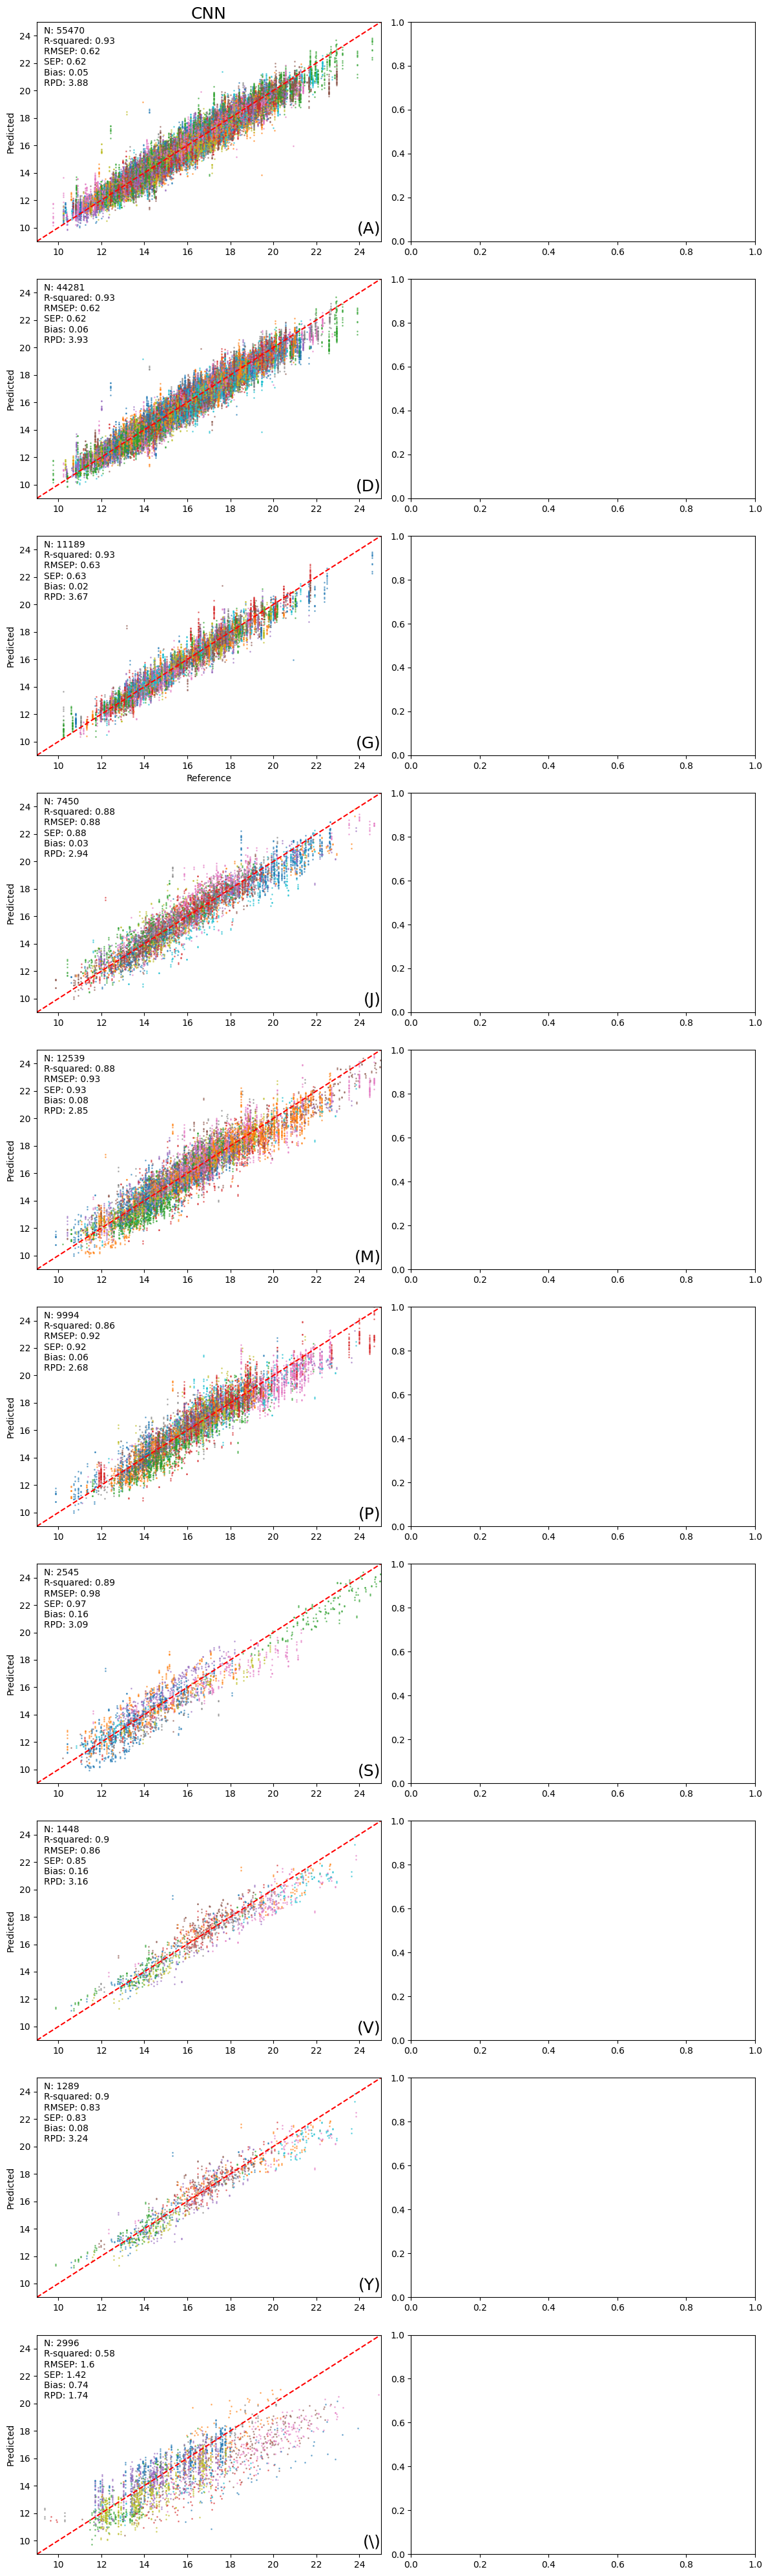

In [16]:
remove_subsequently_flagged = False

# create a figure with subplots - 4 rows (one for each query) and 3 columns (one for each model)
# plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('default')
fig, axes = plt.subplots(len(test_sets), 2, figsize=(12, 4*len(test_sets)))

# global min and max for axis scaling
global_min, global_max = 9, 25
test_sets


for i, (key, query) in enumerate(test_sets.items()):
    models = {
        "CNN": predictions.query(query),
    }
    if remove_subsequently_flagged:
        models = {
            "CNN": predictions.query(query),
        }
    
    # calculate metrics for each model
    metrics = {}
    for model_name, data in models.items():
        metrics[model_name] = study_utils.utils.calculate_metrics(
            y_true=models[model_name]["y_true"], 
            y_pred=models[model_name]["y_pred"]
        )
    stats = {}
    for model_name, metric in metrics.items():
        stats[model_name] = f"N: {metric['n']}\nR-squared: {round(metric['r2'], 2)}\nRMSEP: {round(metric['rmse'], 2)}\nSEP: {round(metric['sep'], 2)}\nBias: {round(metric['bias'], 2)}\nRPD: {round(metric['rpd'], 2)}"
    
    # plotting
    for j, (model_name, data) in enumerate(models.items()):
        ax = axes[i, j] if len(test_sets) > 1 else axes[j]  # Handle indexing for axes
        
        # generate color mapping for populations
        unique_populations = data["population"].unique()
        for population in unique_populations:
            data_p = data[data["population"] == population]
            ax.scatter(data_p["y_true"], data_p["y_pred"], s=1, alpha=0.5)
        ax.plot([global_min, global_max], [global_min, global_max], linestyle='--', color='red')
        
        if j in [0]: 
            ax.set_ylabel("Predicted")
            
        if i in [0]: 
            ax.set_title(model_name, fontsize=18, pad=-2)
            
        if i == len(models.items()) + 1: 
            # Only set xlabel for the bottom subplot
            ax.set_xlabel("Reference")
        
        ax.text(0.02, 0.98, stats[model_name], transform=ax.transAxes, fontsize=10, ha='left', va='top')
        title_label = chr(65 + i*3 + j)
        ax.text(1.0, 0.02, f"({title_label})", transform=ax.transAxes, fontsize=18, ha='right', va='bottom') 
        
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(global_min, global_max)
        


plt.tight_layout()
plt.show()


## Box and Whisker plots

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_conv_1_kernel_size,params_lr_init,params_lr_min_ratio,params_pretreatment,...,params_wavelength_range,user_attrs_metric_calibration_mse,user_attrs_metric_calibration_rmse,user_attrs_metric_tuning_mse,user_attrs_metric_tuning_rmse,user_attrs_trained_epochs,system_attrs_fixed_params,state,new_obj,new_rmse
0,0,0.394137,2024-03-17 20:11:13.371715,2024-03-17 20:24:11.924506,0 days 00:12:58.552791,128,21,5.000000e-03,0.050,pretreatment_2,...,range_684to990,0.426193,0.705009,0.504316,0.758394,485.0,"{'pretreatment': 'pretreatment_2', 'savgol_win...",COMPLETE,0.394137,0.710152
1,1,5.842570,2024-03-17 20:11:13.383679,2024-03-17 20:17:25.103691,0 days 00:06:11.720012,512,85,3.111065e-07,0.250,pretreatment_1,...,range_402to990,119.409050,11.173320,118.614960,11.137742,750.0,NaN,COMPLETE,5.842570,10.891050
2,2,9.003330,2024-03-17 20:11:13.390955,2024-03-17 20:17:18.263749,0 days 00:06:04.872794,512,93,1.305386e-07,0.150,pretreatment_1,...,range_720to990,204.547684,14.623785,200.708176,14.491915,750.0,NaN,COMPLETE,9.003330,14.167151
3,3,0.781385,2024-03-17 20:17:18.327763,2024-03-17 20:22:25.347610,0 days 00:05:07.019847,512,61,2.642442e-06,0.050,pretreatment_1,...,range_720to990,2.146610,3.092404,2.219562,3.104179,750.0,NaN,COMPLETE,0.781385,1.489819
4,4,1.210557,2024-03-17 20:17:25.377095,2024-03-17 20:22:13.041683,0 days 00:04:47.664588,512,57,6.664291e-06,0.100,pretreatment_0,...,range_720to990,4.847624,3.183744,4.562513,3.138649,750.0,NaN,COMPLETE,1.210557,2.136004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1478,0.430303,2024-03-19 17:10:03.483470,2024-03-19 17:14:24.387581,0 days 00:04:20.904111,384,5,2.826221e-03,0.025,pretreatment_3,...,range_402to990,0.246431,0.553000,0.442117,0.708163,332.0,NaN,COMPLETE,0.430303,0.664919
1481,1481,0.420922,2024-03-19 17:13:51.433860,2024-03-19 17:19:08.447609,0 days 00:05:17.013749,320,29,2.354320e-04,0.175,pretreatment_3,...,range_402to990,0.372213,0.610092,0.504074,0.709982,322.0,NaN,COMPLETE,0.420922,0.709982
1483,1483,0.361715,2024-03-19 17:14:38.990835,2024-03-19 17:22:13.945671,0 days 00:07:34.954836,512,5,8.863852e-03,0.025,pretreatment_2,...,range_402to990,0.351832,0.677684,0.424062,0.729031,491.0,NaN,COMPLETE,0.361715,0.651201
1489,1489,0.340842,2024-03-19 17:23:16.253197,2024-03-19 17:29:30.940259,0 days 00:06:14.687062,512,5,7.156409e-03,0.050,pretreatment_3,...,range_402to990,0.372621,0.695161,0.412244,0.723098,603.0,NaN,COMPLETE,0.340842,0.642062


In [55]:
df = study_results.query("state == 'COMPLETE'")
df.loc[df["params_wavelength_range"] == "range_402to990", "wavelength_range"] = "402 - 990 (iv)"
df.loc[df["params_wavelength_range"] == "range_600to990", "wavelength_range"] = "600 - 990 (iii)"
df.loc[df["params_wavelength_range"] == "range_684to990", "wavelength_range"] = "684 - 990 (ii)"
df.loc[df["params_wavelength_range"] == "range_720to990", "wavelength_range"] = "720 - 990 (i)"

df.loc[df["params_pretreatment"] == "pretreatment_0", "pretreatment"] = "(i)"
df.loc[df["params_pretreatment"] == "pretreatment_1", "pretreatment"] = "(ii)"
df.loc[df["params_pretreatment"] == "pretreatment_2", "pretreatment"] = "(iv)"
df.loc[df["params_pretreatment"] == "pretreatment_3", "pretreatment"] = "(iii)"

C:\Users\12196478\AppData\Local\Temp\ipykernel_10104\2714653879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["params_wavelength_range"] == "range_402to990", "wavelength_range"] = "402 - 990 (iv)"
C:\Users\12196478\AppData\Local\Temp\ipykernel_10104\2714653879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["params_pretreatment"] == "pretreatment_0", "pretreatment"] = "(i)"


In [60]:
df.groupby("pretreatment").size()

pretreatment
(i)       32
(ii)      87
(iii)     59
(iv)     472
dtype: int64

C:\Users\12196478\AppData\Local\Temp\ipykernel_10104\3157241950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("pretreatment", inplace=True)
C:\Users\12196478\AppData\Local\Temp\ipykernel_10104\3157241950.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("wavelength_range", inplace=True)


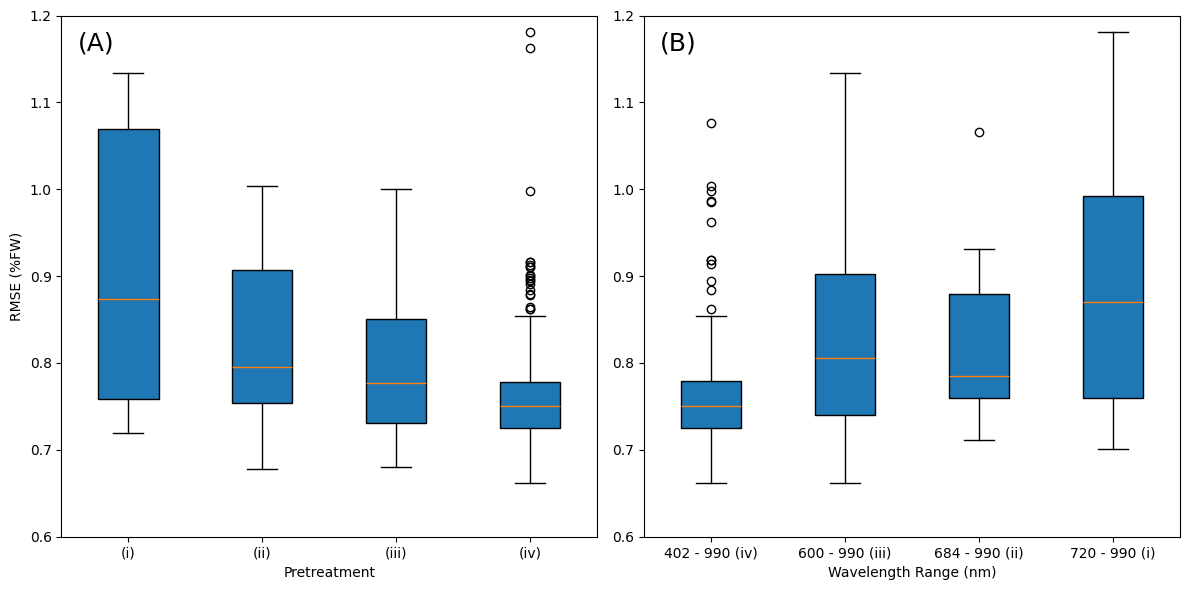

In [56]:


fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Two plots in one row

# First plot
df.sort_values("pretreatment", inplace=True)
axs[0].boxplot(
    [df['user_attrs_metric_tuning_rmse'][df['pretreatment'] == category] for category in df['pretreatment'].unique()],
    labels=df['pretreatment'].unique(),
    patch_artist=True,
)
axs[0].set_xlabel("Pretreatment")
axs[0].set_ylabel("RMSE (%FW)")
axs[0].set_ylim(0.6, 1.2)
axs[0].grid(False)

# Second plot
df.sort_values("wavelength_range", inplace=True)
axs[1].boxplot(
    [df['user_attrs_metric_tuning_rmse'][df['wavelength_range'] == category] for category in df['wavelength_range'].unique()],
    labels=df['wavelength_range'].unique(),
    patch_artist=True,
)
axs[1].set_xlabel("Wavelength Range (nm)")
axs[1].set_ylim(0.6, 1.2)
axs[1].grid(False)

axs[0].text(0.03, 0.97, '(A)', transform=axs[0].transAxes, fontsize=18, verticalalignment='top')
axs[1].text(0.03, 0.97, '(B)', transform=axs[1].transAxes, fontsize=18, verticalalignment='top')

plt.tight_layout()
plt.show()


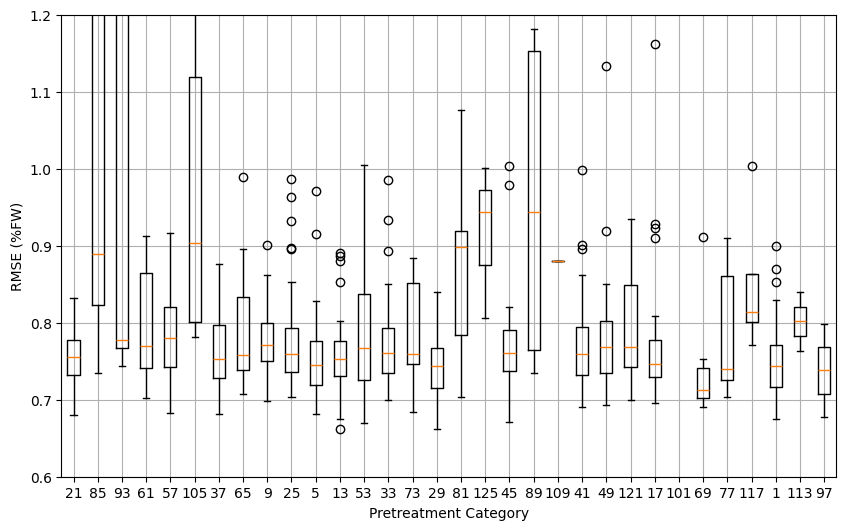

In [52]:
df = study_results.query("state == 'COMPLETE'")

# Creating a box and whisker plot
plt.figure(figsize=(10, 6))
plt.boxplot(
    x=[df['user_attrs_metric_tuning_rmse'][df['params_conv_1_kernel_size'] == category] for category in df['params_conv_1_kernel_size'].unique()],
    labels=df['params_conv_1_kernel_size'].unique()
)
plt.xlabel("Pretreatment Category")
plt.ylabel("RMSE (%FW)")
plt.ylim(0.6, 1.2)
plt.grid(True)
plt.show()

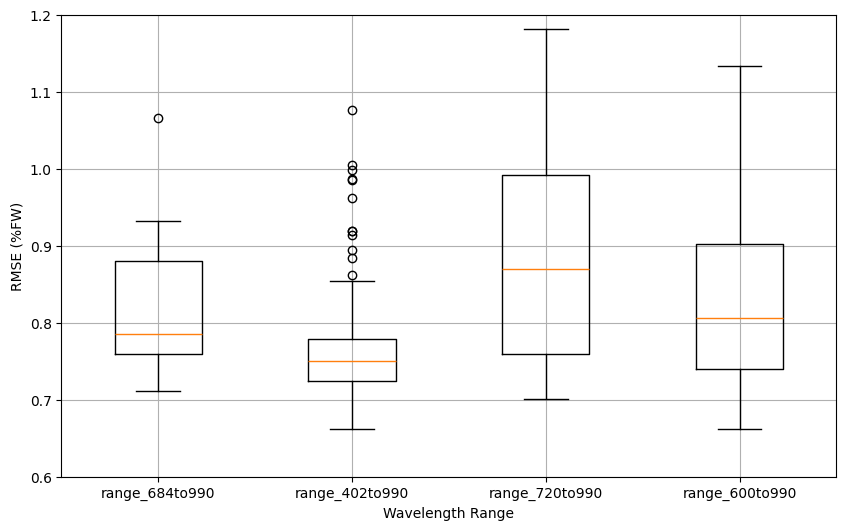

In [33]:
df = study_results.query("state == 'COMPLETE'")

# Creating a box and whisker plot
plt.figure(figsize=(10, 6))
plt.boxplot(
    x=[df['user_attrs_metric_tuning_rmse'][df['params_wavelength_range'] == category] for category in df['params_wavelength_range'].unique()],
    labels=df['params_wavelength_range'].unique()
)
plt.xlabel("Wavelength Range")
plt.ylabel("RMSE (%FW)")
plt.ylim(0.6, 1.2)
plt.grid(True)
plt.show()